<a href="https://colab.research.google.com/github/sergfer26/Proyectos-II/blob/main/tareas/tarea2/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Tarea 2] Clasificación categórica de imágenes de flores usando redes neuronales




In [ ]:
import torch 
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
matplotlib.style.use('ggplot')

### Revisar disponiblidad del gpu

In [ ]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

print(device)

cuda


## Carga de datos desde Colab

In [ ]:
from google.colab import drive # Colab
drive.mount('/content/drive') # Colab

Mounted at /content/drive


In [ ]:
root = root = "/content/drive/MyDrive/Classroom/Proyectos II Grupo 6034/data-sets/17flowers/jpg"

Las imágenes que se usaran en este notebook estan divididas en varias carpetas, cada carpeta representa una especie de flor. Veamos la estrucura del directorio:
```
...17flowers
  +- jpg
    +- 0
    +- 1
    +- 2
    ...
    +- 15
    +- 16
```


## Definición de categorías de flores

In [ ]:
dic = {0: 'Daffodil', 1: 'Snowdrop', 2: 'Daisy', 3: 'ColtsFoot', 4: 'Dandelion', \
       5: 'Cowslip', 6: 'Buttercup', 7: 'Windflower', 8: 'Pansy', 9:'LilyValley', \
       10: 'Bluebell', 11: 'Crocus', 12: 'Iris', 13: 'Tigerlily', 14:'Tulip', \
       15: 'Fritillary', 16: 'Sunflower'}
       
num_classes = len(dic)

## 1. Ejercicio: Definición del conjunto de datos con *data augmentation*.


a)  Busca 5 funciones en el módulo `torchvison.transforms` que permitan alterar a las imagenes del *dataset*. Visita la documentación de [torchvison.transforms](https://pytorch.org/vision/stable/transforms.html). Explica brevemente cada una de las transformaciones.

b)  Define tu propia transformación `my_transform` utilizando `transforms.Compose` para concatenar las transformaciones que encontraste para alterar las imagenes y poder efectuar el proceso de *data augmentation* sobre el conjunto de datos. No olvides incluir `transforms.Resize` además de las otras 5 transformaciones.

**Observación:** asegurate de usar transformaciones que se apliquen de forma aleatoria, en caso contrario utiliza la función `transforms.RandomApply`. A continuación se muestra un ejemplo de su uso:
```
transform = [transforms.Pad(100, fill=(0, 255, 255)), transforms.CenterCrop(100), transforms.RandomRotation(20)]
transform = transforms.Compose([
    transforms.RandomApply(transform, p=0.5)
])
```
Recuerda que el efecto que se busca es aumentar el tamaño del dataset de forma artificial.

**Recomendación**: visita el notebook visto en la clase 15 de la semana 6.




In [ ]:
my_transform = 

In [ ]:
from torchvison.datasets import ImageFolder
dataset = ImageFolder(root, transform=transforms.Resize((224,224)))
# dataset = ImageFolder(root, transform=my_transform)

## 2. Ejercicio: Visualización de imagenes transformadas.

Asegurate que efectivamente se esta aumentando 
el tamaño del *dataset* de forma artificial. Utiliza la función `show_image` para graficar una imagen de `dataset` varias veces de tal forma que se vean distintas transformaciones de la misma imagen. Recuerda que es necesario transformar la imagen de `torch` a `numpy` para poder graficar, los tensores tienen el método `numpy()` para hacer dicha transformación.

In [ ]:
import matplotlib 

def show_image(img):
    np_img = np.copy(np_img)
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

##3. Ejercicio: Definición de conjunto entrenamiento y validación.

Separa el conjunto `dataset` en los conjuntos `train_set` y `val_set`. Asegurante de que $20 \%$ de los datos pertenezca al conjunto de validación. Sugerencia divide los indices de forma aleatoria y en proporción y utiliza la clase `torch.utils.data.Subset`.

In [ ]:
#train_set = 
#val_set = 

##4. Ejercicio: Definición del *Dataloader*.

Divide en *batchs* de tamaño 32 y crea una instacia de `torch.utils.data.Dataloader` para `train_set` y `val_set`. Recuerda usar la bandera `shuffle` para revolver los datos.


In [ ]:
batch_size = 32
train_loader = 
val_loader = 

## 5. Ejercicio: Declaración de la red neuronal con capas convolucionales.

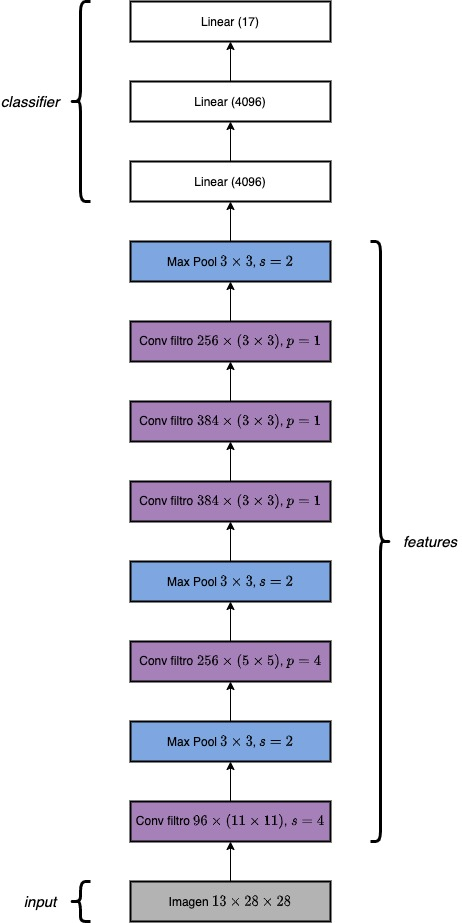



Utilizando el módulo `torch.nn` crea una red neuronal con la arquitectura del popular modelo **AlexNet** considerando 17 clases. Realiza los siguientes pasos:

a) Utilizando el diagrama anterior calcula las dimensiones faltantes del siguiente diagrama. 

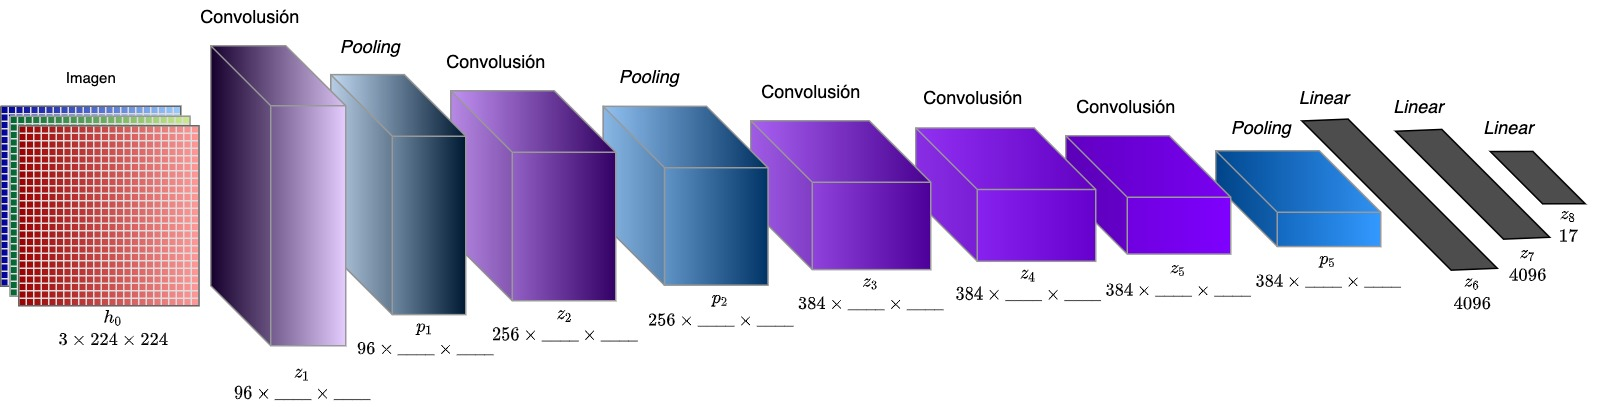


b) Calcula la dimesión de los valores de entrada de la parte FNN de la red. Usa la expresión $c \cdot h \cdot w$
donde $c, h$ y $w$ son el número de canales, largo y ancho de la salida de la última capa  de la  parte CNN, respectivamente.

c) Completa el siguiente código considerando las diemensiones que calculaste en b). Deberás declarar los siguientes atributos o secciones de `AlexNet`: 

*   `features`: corresponde a la parte convolucional de la red.
*   `flatten`: corresponde a la transición entre la parte convolucional y la parte completamente conectada.
*   `classifier`: corresponde a la parte completamente conectada de la red.

Estos tres atributos deberán ser llamados en el método `forward` para definir el flujo de información. Recuerda incluir *padding* y *stride* donde sea necesario.

Utiliza *dropout* con probabilidad $0.5$ en las capas intermedias de `classifier`, es decir, aplica *dropout* antes de las capas $z_6$ y $z_7$). 

**Hint:** Utiliza la clase `nn.Sequential` agrupar funciones de cada seccion de `AlexNet`. Ocupa `nn.Flatten` para aplanar la salida de última capa convolucional. Revisa el documento **LeNet.pdf** para ver como calcular las dimensiones en cada capa. Visita la documentación o revisa los ejemplos vistos en clase. 

In [ ]:
from torch import nn

class AlexNet(nn.Module):

    def __init__(self, num_classes=17):
        super(AlexNet, self).__init__()
        self.features = 
        self.flatten = 
        self.classifier = 
      
    def forward(self, x):
      pass


In [ ]:
net = AlexNet(17)
net = net.to(device)
print(net)

##6. Ejercicio: Selección de optimizador y función de costos.

a) Investiga cómo declarar el optimizador que presentaste en la exposición de algoritmos de optimización de redes neuronales utilizando el módulo `torch.optim`. Revisa la documentación en la sección *Algorithms* de dicho módulo, puedes encontrar la página web [aquí](https://pytorch.org/docs/stable/optim.html).

In [ ]:
from torch import optim
optimizer = 

b) Utiliza la función de costos de *categorical cross entropy*.

In [ ]:
criterion = 

##7. Ejercicio: Entrenamiento.

 a) Diseña una función que ajuste los paramétros por *epoch* y registre la pérdida y precisión después de cada *forward pass*. Asegúrate de considerar que los datos estén habilitados en `device`.

b) Diseña el ciclo del entrenamiento. Asegúrate de guardar en un arreglo la pérdida y precisión de cada *epoch*. Entrena la red durante 40 *epochs*.

c) Grafica los arreglos de pérdida y precisión.

## 8. Ejercicio: *Transfer learning*.

a) Del módulo `torchvison.models` carga la red ya entrenada de AlexNet.

In [ ]:
other_net =
print(other_net)

En este caso la red cargada tiene $1,000$ valores de salida.

b) Cambia la última capa de `other_net.classifier` de tal forma que tenga $17$ valores de salida. 

c) Cambia el valor `p` de las capas con *dropout*, establece $p=0.4$.

In [ ]:
other_net = other_net.to(device)

## 9. Ejercicio: Entrenamiento con *transfer learning*

a) Congela las capas de `other_net.features` para que sólo sea necesario entrenar las capas de `other_net.classifier`.

b) Entrena durante $10$ *epochs* la red `other_net`.

c) Grafica la función de pérdida y precisión en cada paso.

## 10. Ejercicio: Mi conclusión.

Describe brevemente tus observaciones de este *notebook*. Menciona las diferencias entre los entrenamientos realizados en los ejercicios 7 y 9 ¿Qué entrenamiento fue mejor y porqué piensas que suecede esto?